In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/My Drive/listings.csv'
df = pd.read_csv(file_path)

Mounted at /content/drive


In [2]:
# Goal: Find our investor the best location to invest in an AirBnB

### CLEANING OUR DATASET

In [3]:
# Part 1: Deleting columns and listings we don't need
df.drop(columns=['id', 'name', 'host_id', 'host_name', 'neighbourhood_group', 'last_review', 'license'], inplace=True)
df.head()

,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,Inner Richmond,37.788140,-122.465470,Entire home/apt,150.0,30,1,0.03,2,365,0
1,Bayview,37.729800,-122.400960,Private room,NaN,90,0,NaN,1,0,0
2,Mission,37.757210,-122.412450,Entire home/apt,NaN,30,0,NaN,1,0,0
3,Excelsior,37.726761,-122.408522,Private room,69.0,30,6,0.33,13,216,3
4,Marina,37.803660,-122.445180,Entire home/apt,246.0,31,0,NaN,183,341,0


In [4]:
# Part 2: Dropping listings with NaN in the "price" column
df.dropna(subset=['price'], inplace=True)
df.head()

,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,Inner Richmond,37.788140,-122.465470,Entire home/apt,150.0,30,1,0.03,2,365,0
3,Excelsior,37.726761,-122.408522,Private room,69.0,30,6,0.33,13,216,3
4,Marina,37.803660,-122.445180,Entire home/apt,246.0,31,0,NaN,183,341,0
5,Presidio Heights,37.789860,-122.450940,Entire home/apt,328.0,5,12,1.62,1,277,12
6,Castro/Upper Market,37.766000,-122.434980,Private room,135.0,30,7,0.10,2,172,2


In [5]:
# Part 3: Replace NaN wih 0 under the "reviews_per_month" column
df['reviews_per_month'].fillna(0, inplace=True)
df.count()

neighbourhood                     6774
latitude                          6774
longitude                         6774
room_type                         6774
price                             6774
minimum_nights                    6774
number_of_reviews                 6774
reviews_per_month                 6774
calculated_host_listings_count    6774
availability_365                  6774
number_of_reviews_ltm             6774
dtype: int64

In [6]:
df['neighbourhood'].unique()

array(['Inner Richmond', 'Excelsior', 'Marina', 'Presidio Heights',
       'Castro/Upper Market', 'South of Market', 'Outer Mission',
       'Pacific Heights', 'Bernal Heights', 'Financial District',
       'Potrero Hill', 'Crocker Amazon', 'Inner Sunset', 'Noe Valley',
       'Mission', 'Outer Sunset', 'Downtown/Civic Center', 'Bayview',
       'Parkside', 'North Beach', 'Seacliff', 'Ocean View',
       'Western Addition', 'Visitacion Valley', 'Haight Ashbury',
       'West of Twin Peaks', 'Russian Hill', 'Nob Hill', 'Chinatown',
       'Twin Peaks', 'Outer Richmond', 'Glen Park', 'Lakeshore',
       'Presidio', 'Diamond Heights', 'Golden Gate Park'], dtype=object)

In [7]:
# Part 4: Replace the 'neighbourhood' with a value number value

# Find all the unique neighbourhood names
string_list = df['neighbourhood'].unique()

# Map each unique value to an integer value
name_map = {string_list[i]: i for i in range(len(string_list))}

# Replace the neighbourhood name to the corresponding value
df['neighbourhood'] = df['neighbourhood'].replace(name_map)
df.head()

,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,0,37.788140,-122.465470,Entire home/apt,150.0,30,1,0.03,2,365,0
3,1,37.726761,-122.408522,Private room,69.0,30,6,0.33,13,216,3
4,2,37.803660,-122.445180,Entire home/apt,246.0,31,0,0.00,183,341,0
5,3,37.789860,-122.450940,Entire home/apt,328.0,5,12,1.62,1,277,12
6,4,37.766000,-122.434980,Private room,135.0,30,7,0.10,2,172,2


In [8]:
df['room_type'].unique()

array(['Entire home/apt', 'Private room', 'Hotel room', 'Shared room'],
      dtype=object)

In [9]:
# Part 4: Replace the 'room_type' with a value number value
string_list2 = df['room_type'].unique()
name_map2 = {string_list2[i]: i for i in range(len(string_list2))}
df['room_type'] = df['room_type'].replace(name_map2)
df.head()

,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,0,37.788140,-122.465470,0,150.0,30,1,0.03,2,365,0
3,1,37.726761,-122.408522,1,69.0,30,6,0.33,13,216,3
4,2,37.803660,-122.445180,0,246.0,31,0,0.00,183,341,0
5,3,37.789860,-122.450940,0,328.0,5,12,1.62,1,277,12
6,4,37.766000,-122.434980,1,135.0,30,7,0.10,2,172,2


### MACHINE LEARNING

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [11]:
# For this Machine Learning part, we want to find the correlation between price to the other columns
X = df.drop(columns=['price', 'latitude', 'longitude'])
y = df['price']

In [12]:
# Train our model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [13]:
lr.coef_

array([-8.48275345e-01, -8.51871755e+01, -6.34739803e-01, -1.24207898e-01,
       -9.95106052e+00, -2.34420607e-01,  1.36808108e-01,  4.35781463e-03])

In [14]:
predictions = lr.predict(X_test)

In [15]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, predictions)

135.52755072818545

In [16]:
df["price"].describe()

count     6774.000000
mean       216.232211
std        468.579471
min         10.000000
25%        100.000000
50%        150.000000
75%        224.000000
max      25000.000000
Name: price, dtype: float64

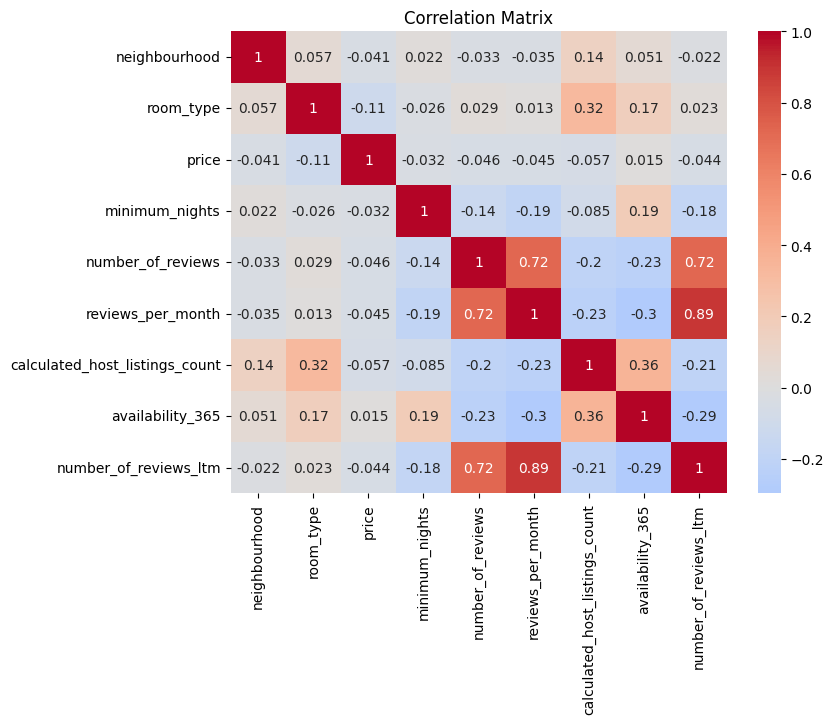

In [17]:
# Calculate correlation matrix
corr_matrix = df.drop(columns=['longitude', 'latitude']).corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)

plt.title('Correlation Matrix')
plt.show()

### EXPORT CSV FOR TABLEAU

In [18]:
# prompt: export the df to a csv

# df.to_csv('/content/drive/My Drive/listings_cleaned.csv')
